In [129]:
import pandas
import requests
from bs4 import BeautifulSoup

def make_tr_list(html): # 'tr'태그의 리스트를 만들어주는 함수
    table = html.find('table',{'class':'type2'}) # 테이블 찾아주기
    tr_list = table.find_all('tr',{'onmouseover':'mouseOver(this)'}) # 'tr'태그 찾아서 저장
    return tr_list

def extract_day(tr): # 하루치 뽑아내기
    td_list = tr.find_all('td')
    row = [td_list[0].text]
    for td in td_list[1:]:
        row.append(int(td.text.strip().replace(',','')))
    del row[2] 
    return row

In [130]:
code = '005930' # 삼전 주식 코드
page = 1 
url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'
headers = {'User-Agent' : 'Mozilla/5.0'} # 헤더명을 지정해서 경로우회
response = requests.get(url, headers = headers)
response
content = response.content
html = BeautifulSoup(content, 'html.parser')

In [154]:
tr_list = make_tr_list(html)
days = []
for tr in tr_list: # 10일치 뽑아내기
    day = extract_day(tr)
    days.append(day) # 2차원 리스트로 만들어줌
    
df = pandas.DataFrame(days) # 판다스 데이터프레임으로 만들어줌
df.columns = ['date','close','start','max','min','volume']
df.set_index('date',inplace=True)
df['close']

date
2021.01.08    88800
2021.01.07    82900
2021.01.06    82200
2021.01.05    83900
2021.01.04    83000
2020.12.30    81000
2020.12.29    78300
2020.12.28    78700
2020.12.24    77800
2020.12.23    73900
Name: close, dtype: int64

<AxesSubplot:>

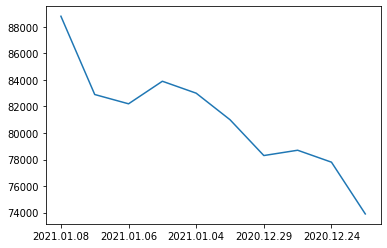

In [155]:
tr_list = make_tr_list(html)
df = pandas.DataFrame(columns = ['close','start','max','min','volume'])
for tr in tr_list: 
    day = extract_day(tr)
    df.loc[day[0]] = day[1:]
df['close'].plot()

In [157]:
df.info() # 데이터프레임의 내용 확인 (데이터의 자료형 및 결측치 확인 가능)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2021.01.08 to 2020.12.23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   10 non-null     object
 1   start   10 non-null     object
 2   max     10 non-null     object
 3   min     10 non-null     object
 4   volume  10 non-null     object
dtypes: object(5)
memory usage: 480.0+ bytes
